# Import modules

In [2]:
import mvranalysis as mvr
import os
import numpy as np
import pandas as pd
import scipy.io as sio
from glob import glob
import json

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from colorsys import hsv_to_rgb, rgb_to_hsv
%matplotlib inline

In [3]:
path148 = '/Volumes/freeman/Nick/mVR/148'
path149 = '/Volumes/freeman/Nick/mVR/149'
path150 = '/Volumes/freeman/Nick/mVR/150'
path151 = '/Volumes/freeman/Nick/mVR/151'

paths = [path148,path149,path150,path151]

In [4]:
sessions = [glob(path+'/trial_summary*.csv') for path in paths]
[sessions[a].sort() for a in range(len(sessions))]
sessions.sort()

In [5]:
summaries = [glob(path + '/animalsummary*.csv') for path in paths]

# Get animal stats (batch)

In [7]:
animal_stats = [pd.Series.from_csv(x[0]) for x in summaries]

In [9]:
UB_before = [x.correctBefore for x in animal_stats]
AB = [x.correctAntibias for x in animal_stats]
UB_after = [x.correctAfter for x in animal_stats]

means = np.array([UB_before, AB, UB_after])
meansT = np.transpose(means)
print meansT

[[ 0.15558036  0.94017094  1.        ]
 [ 0.43029819  0.95729458  0.85096634]
 [ 0.29021368  0.97061201  0.995     ]
 [ 0.18445553  0.97012165  1.        ]]


In [10]:
mean_before = np.mean(UB_before)
mean_antibias = np.mean(AB)
mean_after = np.mean(UB_after)

perc_corr =  [mean_before, mean_antibias, mean_after]
print perc_corr

[0.26513693807424998, 0.95954979616425007, 0.96149158424824999]


# Create batch bar plot (performance)

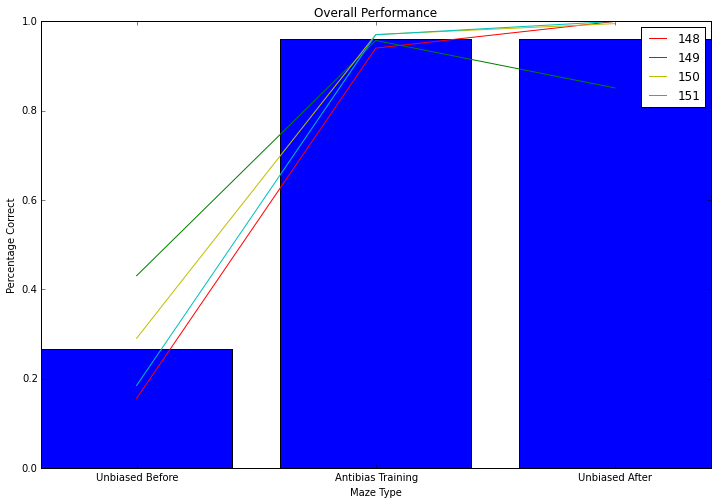

In [11]:
plt.figure(figsize = [12,8])
plt.bar(range(0,len(perc_corr)),perc_corr,align = 'center')
labels = ['Unbiased Before', 'Antibias Training', 'Unbiased After']
ypos = np.arange(len(perc_corr))
plt.xticks(ypos,labels)
plt.xlabel('Maze Type')
plt.ylabel('Percentage Correct')
plt.title('Overall Performance')

plt.plot(ypos, meansT[0],'-',color = 'r')
plt.plot(ypos, meansT[1], '-',color = 'g')
plt.plot(ypos,meansT[2],'-',color = 'y')
plt.plot(ypos,meansT[3],'-',color = 'c')
plt.legend(['148', '149', '150','151'])


# Compile Rolling averages

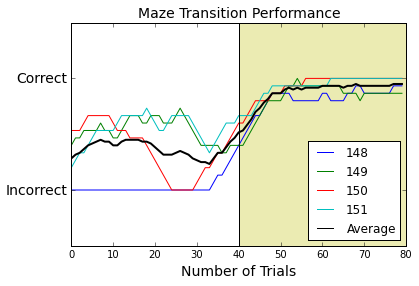

In [30]:
mainpath = '/Volumes/freeman/Nick/mVR/sessions'

averages = glob(mainpath+'/rollingavg*.csv')
averages.sort()
averages = [pd.Series.from_csv(x) for x in averages]

#print len(averages[0]),len(averages[1]),len(averages[2]),len(averages[3])
plt.plot(averages[0])
plt.ylim(-0.5,1.5)
plt.xlim(0,80)
plt.plot(averages[1])
plt.plot(averages[2])
plt.plot(averages[3])
plt.xlabel('Number of Trials',fontsize = 14)
plt.yticks([0,1], ['Incorrect','Correct'],fontsize = 14)
plt.title('Maze Transition Performance', fontsize = 14)
plt.axvline(x=40,c = 'k')
plt.axvspan(40,80, facecolor = 'y', alpha = 0.3)

avgT = np.transpose(averages)

totalavg = [np.mean(i) for i in avgT]

plt.plot(totalavg, linewidth = 2.0, color = 'k')


plt.legend(['148', '149','150','151', 'Average'], loc = 'best')